Desafio 30: Análise de Vendas por Região e Categoria

📂 Dataset: Histórico de vendas de produtos por região, categoria e data.
Colunas: Produto, Região, Categoria, Quantidade, Valor_Unitario, Data_Venda

🎯 Tarefas:

Limpe a coluna Valor_Unitario, tratando erros, valores em branco e ausentes.

Crie uma nova coluna Valor_Total com base na multiplicação de Quantidade e Valor_Unitario.

Qual região obteve o maior valor total de vendas?

Qual categoria teve a maior média de valor unitário?

Crie um gráfico de barras mostrando o total de vendas por categoria.

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("dia_30_vendas_regiao_categoria.csv")
df.head()

,Produto,Região,Categoria,Quantidade,Valor_Unitario,Data_Venda
0,Produto_21,Norte,Brinquedos,7,20.0,2024-12-26
1,Produto_6,Sul,Eletrônicos,34,220.0,2024-08-09
2,Produto_3,Centro-Oeste,Alimentos,38,80.0,2024-12-03
3,Produto_21,Sudeste,Brinquedos,5,30.0,2025-01-15
4,Produto_2,Norte,Móveis,26,160.0,2024-12-28


In [8]:
#Limpe a coluna Valor_Unitario, tratando erros, valores em branco e ausentes.
df["Valor_Unitario"] = pd.to_numeric(df["Valor_Unitario"], errors="coerce")
df["Valor_Unitario"] = df["Valor_Unitario"].fillna(
    df.groupby("Produto")["Valor_Unitario"].transform("mean")
)
df["Valor_Unitario"].isnull().sum()

0

In [10]:
#Crie uma nova coluna Valor_Total com base na multiplicação de Quantidade e Valor_Unitario.
df["Valor_Total"] = df["Quantidade"] * df["Valor_Unitario"]
df.head()

,Produto,Região,Categoria,Quantidade,Valor_Unitario,Data_Venda,Valor_Total
0,Produto_21,Norte,Brinquedos,7,20.0,2024-12-26,140.0
1,Produto_6,Sul,Eletrônicos,34,220.0,2024-08-09,7480.0
2,Produto_3,Centro-Oeste,Alimentos,38,80.0,2024-12-03,3040.0
3,Produto_21,Sudeste,Brinquedos,5,30.0,2025-01-15,150.0
4,Produto_2,Norte,Móveis,26,160.0,2024-12-28,4160.0


In [31]:
#Qual região obteve o maior valor total de vendas?
regiaoMaisVendas = df.groupby("Região")["Valor_Total"].sum().sort_values(ascending=True).round(2)
print(f"a Região com o maior valor total de vendas foi: {regiaoMaisVendas.idxmax()} ({regiaoMaisVendas.apply(lambda x: f"R$ {x:,.2f}").max()})")

a Região com o maior valor total de vendas foi: Sul (R$ 591,150.66)


In [34]:
#Qual categoria teve a maior média de valor unitário?
categoriaMaiorMedioUnitaria = df.groupby("Categoria")["Valor_Unitario"].mean()
print(f"a Categoria com o maior média de valor unitário foi: {categoriaMaiorMedioUnitaria.idxmax()} ({categoriaMaiorMedioUnitaria.apply(lambda x: f"R$ {x:,.2f}").max()})")

a Categoria com o maior média de valor unitário foi: Eletrônicos (R$ 273.83)


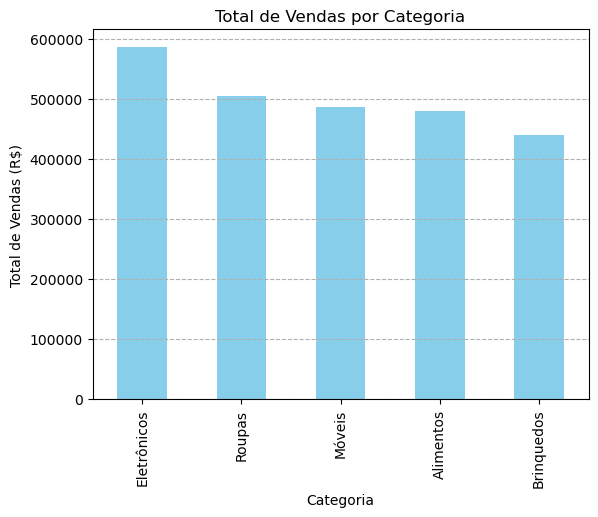

In [42]:
#Crie um gráfico de barras mostrando o total de vendas por categoria.
totalPorCategoria = df.groupby("Categoria")["Valor_Total"].sum().sort_values(ascending=False)
totalPorCategoria.plot(kind="bar", color="skyblue")
plt.title("Total de Vendas por Categoria")
plt.xlabel("Categoria")
plt.ylabel("Total de Vendas (R$)")
plt.grid(axis="y",linestyle="--")
plt.show()